In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical

In [5]:
data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

In [6]:
k = len(set(y_train))
k

10

In [7]:
#dims
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
#Model Building.
i = Input(shape=X_train.shape[1:])
x = Conv2D(32, (3,3), strides=2,activation="relu")(i)
x = Conv2D(64, (3,3), strides=2,activation="relu")(x)
x = Conv2D(128, (3,3), strides=2,activation="relu")(x)
x = Flatten()(x)
x = Dense(64, activation="relu")(x)
x = Dense(k, activation="softmax")(x)

In [9]:
model = tf.keras.Model(i,x)

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics = ["accuracy"])

In [11]:
import math
def calculate_spe(x):
  return int(math.ceil((1.*x)/32))

In [12]:
spe = calculate_spe(X_train.shape[0])

In [13]:
r = model.fit(X_train,y_train, validation_split=0.2,steps_per_epoch=spe, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 21s 5ms/step - loss: 0.5394 - accuracy: 0.8119 - val_loss: 0.4261 - val_accuracy: 0.8423
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3772 - accuracy: 0.8604 - val_loss: 0.3848 - val_accuracy: 0.8569
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3266 - accuracy: 0.8781 - val_loss: 0.3740 - val_accuracy: 0.8648
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2953 - accuracy: 0.8885 - val_loss: 0.3888 - val_accuracy: 0.8666
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2719 - accuracy: 0.8971 - val_loss: 0.3594 - val_accuracy: 0.8767
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2465 - accuracy: 0.9078 - val_loss: 0.3682 - val_accuracy: 0.8794
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2208 - accuracy: 0.9161 - val_loss: 0.4197 - val_accura

1875/1875 [==============================] - 12s 6ms/step - loss: 0.1177 - accuracy: 0.9581 - val_loss: 0.6368 - val_accuracy: 0.8743


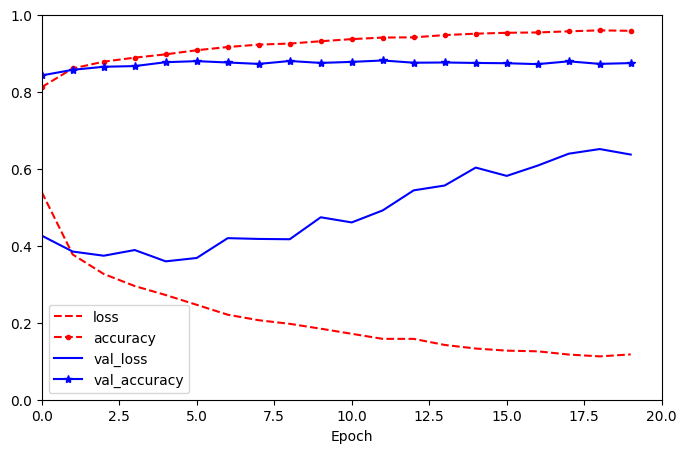

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(r.history).plot(figsize=(8,5), xlim=[0,20], ylim=[0,1],
                             xlabel="Epoch", style=['r--', "r--.", "b-", "b-*"])
plt.show()

In [30]:
#Testing.
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6522 - accuracy: 0.8734


[0.6522444486618042, 0.8733999729156494]

## Train_acc = 95% , val_Acc = 87%, testing_acc = 87%

## Case of Overfitting.

In [31]:
#Lets use Dropout Function.
#Model Building.
i = Input(shape=X_train.shape[1:])
x = Conv2D(32, (3,3), strides=2,activation="relu")(i)
x = Conv2D(64, (3,3), strides=2,activation="relu")(x)
x = Conv2D(128, (3,3), strides=2,activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.4)(x)
x = Dense(k, activation="softmax")(x)

model_1 = tf.keras.Model(i, x)

In [34]:
model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [35]:
r = model_1.fit(X_train, y_train, validation_split=0.2, steps_per_epoch=spe, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.7993 - accuracy: 0.7263 - val_loss: 0.4679 - val_accuracy: 0.8204
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5156 - accuracy: 0.8129 - val_loss: 0.4191 - val_accuracy: 0.8406
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4640 - accuracy: 0.8299 - val_loss: 0.3933 - val_accuracy: 0.8547
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4315 - accuracy: 0.8413 - val_loss: 0.3713 - val_accuracy: 0.8637
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4113 - accuracy: 0.8476 - val_loss: 0.3764 - val_accuracy: 0.8559
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3963 - accuracy: 0.8548 - val_loss: 0.3622 - val_accuracy: 0.8594
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3780 - accuracy: 0.8587 - val_loss: 0.3528 - val_accura

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3093 - accuracy: 0.8861 - val_loss: 0.3493 - val_accuracy: 0.8817


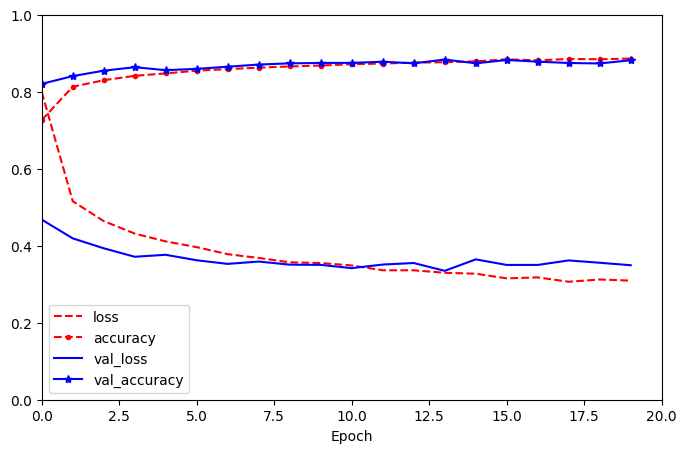

In [42]:
pd.DataFrame(r.history).plot(figsize=(8,5), xlim=[0,20], ylim=[0,1],
                             xlabel="Epoch", style=['r--', "r--.", "b-", "b-*"])
plt.show()

In [36]:
model_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3668 - accuracy: 0.8755


[0.3668126165866852, 0.8755000233650208]

## Overfitting is not There anymore by using Dropout but, val_acc is not changing does this mean we have actually reached POO.
- So lets try with other Parameters(basically trying to change the path for the current gradient descent) .

In [38]:
#Model Building.
i = Input(shape=X_train.shape[1:])
x = Conv2D(32, (3,3), strides=2,activation="relu")(i)
x = Conv2D(64, (3,3), strides=2,activation="relu")(x)
x = Conv2D(128, (3,3), strides=2,activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.4)(x)
x = Dense(k, activation="softmax")(x)

model_2 = tf.keras.Model(i, x)

In [39]:
model_2.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [41]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [43]:
r = model_2.fit(X_train, y_train, validation_split=0.2, steps_per_epoch=spe, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 12s 5ms/step - loss: 0.7794 - accuracy: 0.7422 - val_loss: 0.4467 - val_accuracy: 0.8269
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5065 - accuracy: 0.8147 - val_loss: 0.3969 - val_accuracy: 0.8508
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4498 - accuracy: 0.8372 - val_loss: 0.4095 - val_accuracy: 0.8468
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4227 - accuracy: 0.8460 - val_loss: 0.3674 - val_accuracy: 0.8629
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4020 - accuracy: 0.8514 - val_loss: 0.3643 - val_accuracy: 0.8650
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3856 - accuracy: 0.8588 - val_loss: 0.3490 - val_accuracy: 0.8702
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3802 - accuracy: 0.8580 - val_loss: 0.3516 - val_accurac

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3087 - accuracy: 0.8881 - val_loss: 0.3436 - val_accuracy: 0.8773


In [44]:
model_2.compile(loss="categorical_crossentropy",
                optimizer="RMSprop",
                metrics=["accuracy"])

In [45]:
r = model_2.fit(X_train, y_train, validation_split=0.2, steps_per_epoch=spe, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 12s 5ms/step - loss: 0.3268 - accuracy: 0.8940 - val_loss: 0.4299 - val_accuracy: 0.8745
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3597 - accuracy: 0.8849 - val_loss: 0.4770 - val_accuracy: 0.8717
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4063 - accuracy: 0.8751 - val_loss: 0.4907 - val_accuracy: 0.8666
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4596 - accuracy: 0.8637 - val_loss: 0.4915 - val_accuracy: 0.8506
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4992 - accuracy: 0.8524 - val_loss: 0.5487 - val_accuracy: 0.8612
Epoch 6/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.5574 - accuracy: 0.8386 - val_loss: 0.5194 - val_accuracy: 0.8565
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6249 - accuracy: 0.8229 - val_loss: 0.5816 - val_accurac

1875/1875 [==============================] - 6s 3ms/step - loss: 0.9514 - accuracy: 0.7241 - val_loss: 0.8506 - val_accuracy: 0.7278


In [46]:
model_2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9350 - accuracy: 0.7128


[0.934973955154419, 0.7128000259399414]